In [1]:
# importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(7,5)})
sns.set_style('whitegrid', {'grid.linestyle':'--'})

In [2]:
# Reading in training and testing file

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

In [6]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
test.shape

(1459, 80)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

There are many columns that have large number of null values that would need to be treated before prediction.

In [10]:
# combining the training and testing data sets 
train['dataset'] = 'Train'
test['dataset'] = 'Test'

df = pd.concat([train, test])

df.shape

(2919, 82)

In [11]:
df.set_index('Id', inplace=True)

## Exploratory Data Analysis

Looking at each variable to better understand how they relate to the Sale Price.

Some hypothesis of things that would impact Price are:
1. The size of the house in sqft and # of bedroom and bathrooms
2. The location of the house 
3. Age of the house
4. Condition of the house

For the exploratory analysis, I am splitting the variables into 11 categories:

1. Type of House: `MSSubClass, MSZoning, BldgType, HouseStyle`
2. Condition: `OverallQual, OverallCond, ExterQual, ExterCond, Functional, PoolQC, Fence`
3. Age: `YearBuilt, YearRemodAdd`
4. Utilites: `Utilities, Heating, HeatingQC, CentralAir, Electrical`
5. Location: `LotConfig, Neighborhood, Condition1, Condition2`
6. Size: `LotFrontage, LotArea, LowQualFinSF, GrLivArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, PoolArea, EnclosedPorch, 3SsnPorch, ScreenPorch, 1stFlrSF, 2ndFlrSF`
7. Areas in the house: `Kitchen, KitchenQual, TotRmsAbvGrd, GarageType, GarageYrBuilt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond` 
8. Bedrooms/Bathrooms: `Bedrooms, BsmtFullBT, BsmtHalfBt, FullBath, HalfBath` 
9. Basement: `BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, TotBsmtSF, BsmtFinType2, BsmtFinSF2, BsmtUnfSF` 
10. Outside: `RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea`
11. Other: `Street, LotShape, Alley, Foundation, LandContour, FireplaceQu, Fireplace, LandSlope, MoSold, Yrsold, SaleType, SaleCondition`

In [12]:
# Checking for NULL Values in each column
null_columns = {}
total_rows = df.shape[0]

for i in df.columns:
    if df[i].isnull().sum() == 0:
        continue
    else:
        null_values = df[i].isnull().sum()
        null_columns[i] = round((null_values/total_rows)*100,2)

null_ser = pd.Series(null_columns)
print(null_ser.sort_values(ascending=False))

PoolQC          99.66
MiscFeature     96.40
Alley           93.22
Fence           80.44
SalePrice       49.98
FireplaceQu     48.65
LotFrontage     16.65
GarageCond       5.45
GarageYrBlt      5.45
GarageFinish     5.45
GarageQual       5.45
GarageType       5.38
BsmtExposure     2.81
BsmtCond         2.81
BsmtQual         2.77
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
Functional       0.07
BsmtHalfBath     0.07
BsmtFullBath     0.07
Utilities        0.07
KitchenQual      0.03
TotalBsmtSF      0.03
BsmtUnfSF        0.03
GarageCars       0.03
GarageArea       0.03
BsmtFinSF2       0.03
BsmtFinSF1       0.03
Exterior2nd      0.03
Exterior1st      0.03
SaleType         0.03
Electrical       0.03
dtype: float64


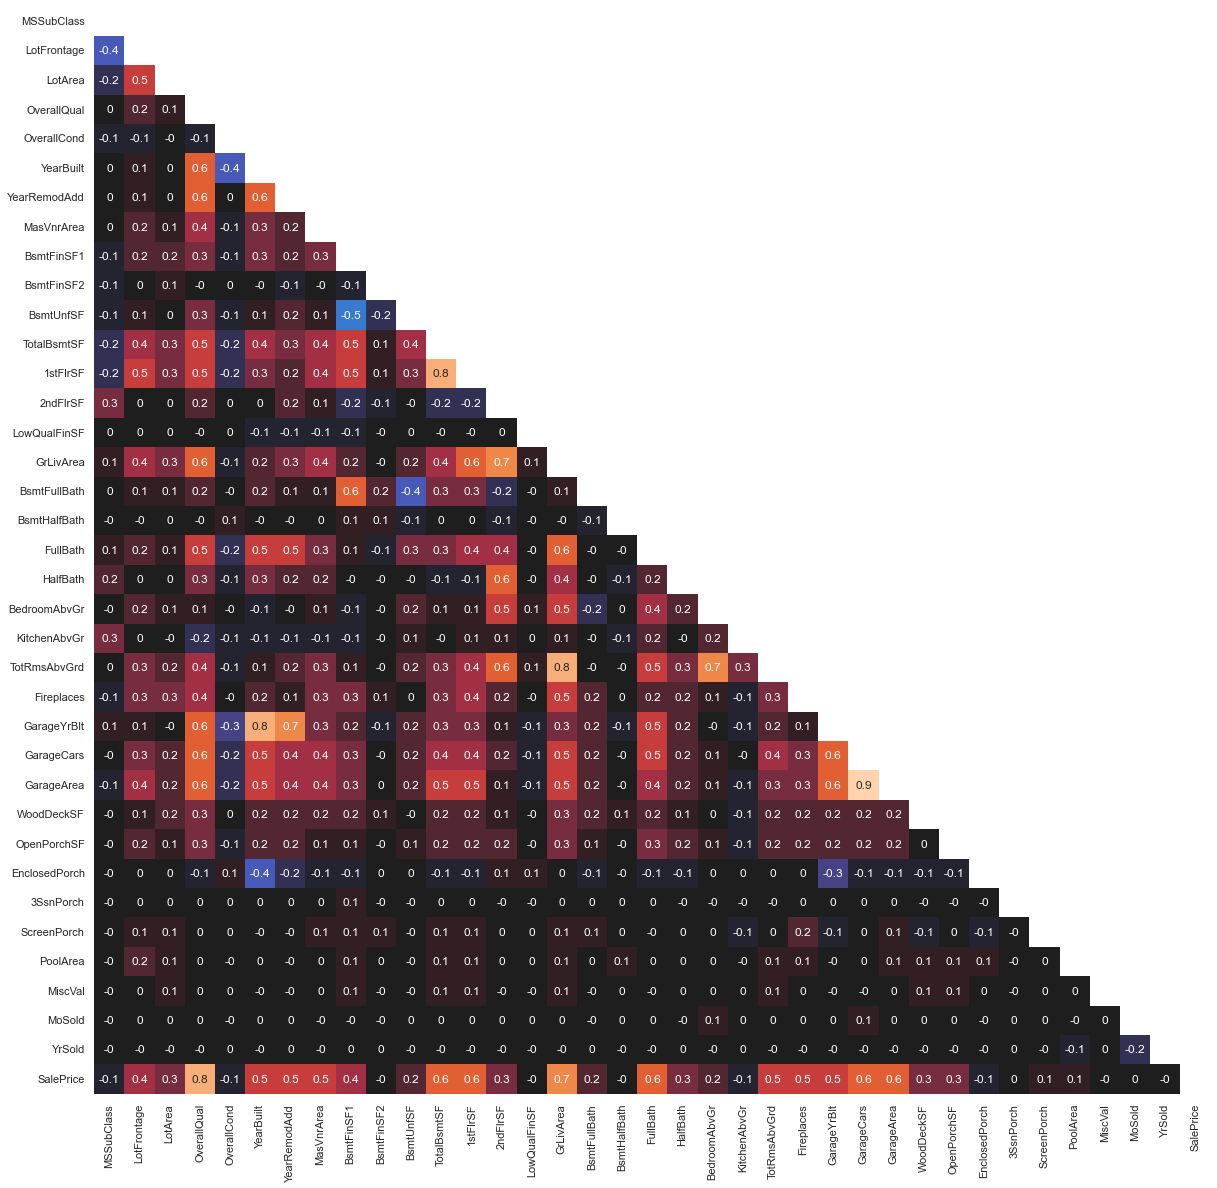

In [13]:
# Checking for relationships between variables 
fig, axs = plt.subplots(1,1,figsize=(20,20))
corr = df.corr()
corr = corr.round(1)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, 
                xticklabels=corr.columns.values, yticklabels=corr.columns.values,
                center=0, cbar=False, annot=True)

Based on the correlation matrix above, we can notice a few things:
1. Our initial hypothesis seems to be somewhat accurate. SalePrice is highly correlated with Qual, SF, # of rooms variables.
2. There are plenty of variables that are highly correlated with each other. There are also plenty of variables that are not related to any other variable.

## 1. Type of House

<b> Question: </b> What are the different types of dwellings in the dataset? How are they related to the Sale price of a house? How are the different variables associated with each other?

### MSSubClass: Identifies the type of dwelling involved in the sale.	

20:	1-STORY 1946 & NEWER ALL STYLES

30:	1-STORY 1945 & OLDER

40:	1-STORY W/FINISHED ATTIC ALL AGES

45:	1-1/2 STORY - UNFINISHED ALL AGES

50:	1-1/2 STORY FINISHED ALL AGES

60:	2-STORY 1946 & NEWER

70:	2-STORY 1945 & OLDER

75:	2-1/2 STORY ALL AGES

80:	SPLIT OR MULTI-LEVEL

85:	SPLIT FOYER

90:	DUPLEX - ALL STYLES AND AGES

120:	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

150:	1-1/2 STORY PUD - ALL AGES

160:	2-STORY PUD - 1946 & NEWER

180:	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

190:	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [14]:
# convert MSSubClass to a categorical variable
df['MSSubClass'] = df['MSSubClass'].astype('category')

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

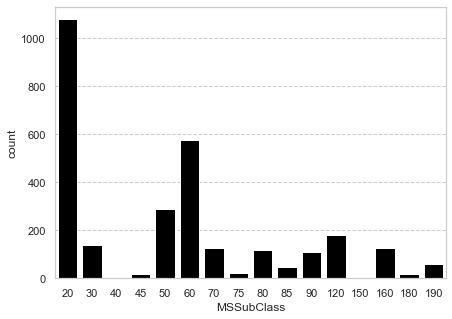

In [15]:
sns.countplot(x='MSSubClass', data=df, color='black')

In [16]:
df['MSSubClass'].value_counts(normalize=True)

20     0.369647
60     0.196985
50     0.098321
120    0.062350
30     0.047619
70     0.043851
160    0.043851
80     0.040425
90     0.037342
190    0.020898
85     0.016444
75     0.007879
45     0.006166
180    0.005824
40     0.002055
150    0.000343
Name: MSSubClass, dtype: float64

There are many sub classes that are less than 5% of overall row count. Grouping them into "Other Sub Class" bucket.

In [17]:
def MSSubClass_Groupings(value):
    if value == 20:
        return "1-STORY 1946 & NEWER ALL STYLES"
    elif value == 60:
        return "2-STORY 1946 & NEWER"
    elif value == 50:
        return "1-1/2 STORY FINISHED ALL AGES"
    elif value == 120:
        return "1-STORY PUD (Planned Unit Development) - 1946 & NEWER"
    else:
        return "Other Sub Class"
    
df['MSSubClass'] = df['MSSubClass'].apply(lambda x: MSSubClass_Groupings(x))

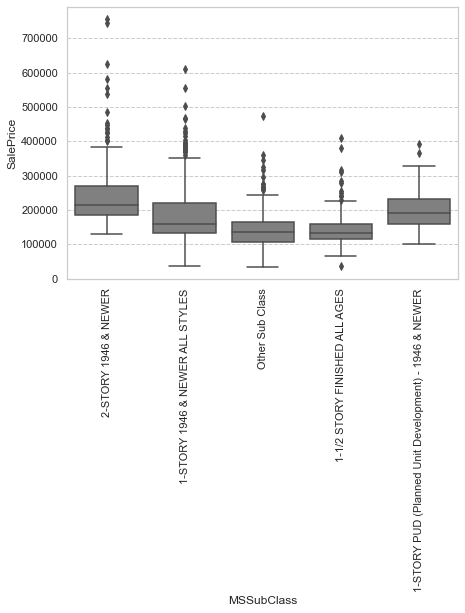

In [18]:
sns.boxplot(x='MSSubClass',y='SalePrice',data=df, color='grey')
plt.xticks(rotation=90)
plt.show()

------------------------------

### MSZoning: Identifies the general zoning classification of the sale.
		
A:	Agriculture

C:	Commercial

FV:	Floating Village Residential

I:	Industrial

RH:	Residential High Density

RL:	Residential Low Density

RP:	Residential Low Density Park 

RM:	Residential Medium Density 


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

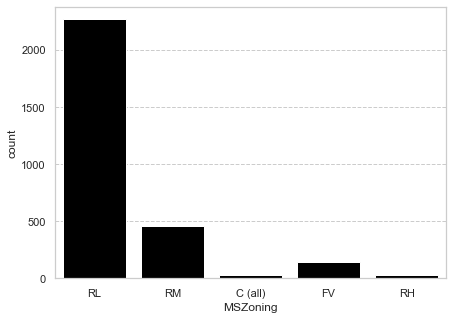

In [19]:
sns.countplot(x='MSZoning', data=df, color='black')

<AxesSubplot:xlabel='MSZoning', ylabel='SalePrice'>

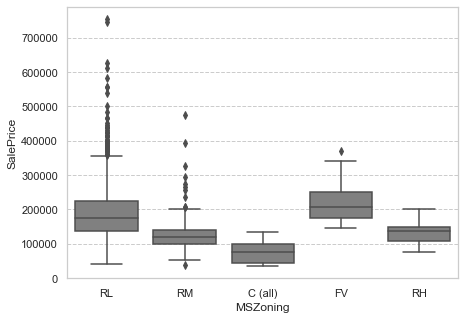

In [20]:
sns.boxplot(x='MSZoning',y='SalePrice',data=df, color='grey')

---------------------------

### BldgType: Type of dwelling

1Fam:	Single-family Detached	

2FmCon:	Two-family Conversion; originally built as one-family dwelling

Duplx:	Duplex

TwnhsE:	Townhouse End Unit

TwnhsI:	Townhouse Inside Unit


<AxesSubplot:xlabel='BldgType', ylabel='count'>

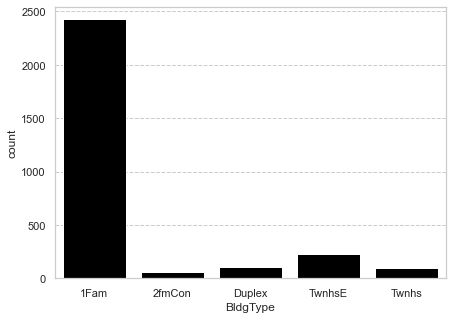

In [21]:
sns.countplot(x='BldgType', data=df, color='black')

<AxesSubplot:xlabel='BldgType', ylabel='SalePrice'>

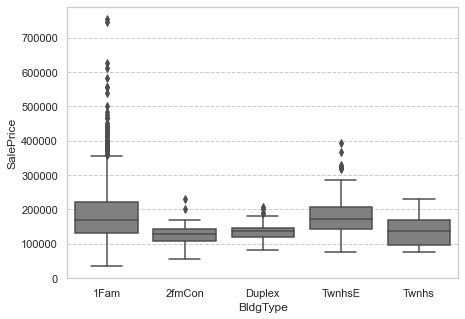

In [22]:
sns.boxplot(x='BldgType',y='SalePrice',data=df, color='grey')

In [23]:
# Since most of the houses are 1Fam, going to convert all the other types to Not 1Fam

df['BldgType'] = np.where(df['BldgType']=='1Fam', '1Fam', 'Not1Fam')

### HouseStyle: : Style of dwelling
	
1Story:	One story

1.5Fin:	One and one-half story: 2nd level finished

1.5Unf:	One and one-half story: 2nd level unfinished

2Story:	Two story

2.5Fin:	Two and one-half story: 2nd level finished

2.5Unf:	Two and one-half story: 2nd level unfinished

SFoyer:	Split Foyer

SLvl:	Split Level

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

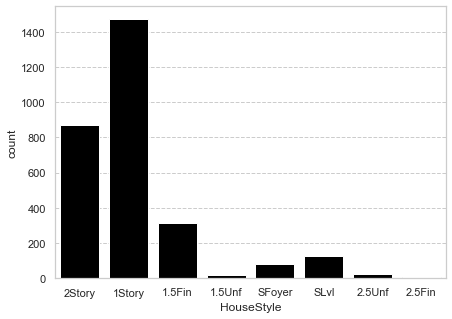

In [24]:
sns.countplot(x='HouseStyle',data=df,color='black')

<AxesSubplot:xlabel='HouseStyle', ylabel='SalePrice'>

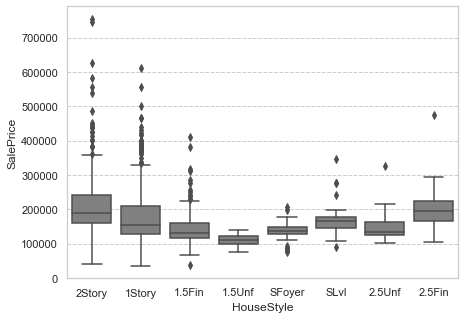

In [25]:
sns.boxplot(x='HouseStyle',y='SalePrice',data=df,color='grey')

In [26]:
# Since most of the values are either 2story, 1Story or 1.5Fin, i will group all the others (except 1.5Unf) into Other category
df['HouseStyle'] = np.where(df['HouseStyle'].isin(['2Story','1Story', '1.5Fin', '1.5Unf']), df['HouseStyle'], 'Other')
df['HouseStyle'] = np.where(df['HouseStyle'].isin(['1.5Fin', '1.5Unf']), '1.5Story', df['HouseStyle'])

### Relationship between the 4 variables

In [27]:
pd.crosstab(df['MSSubClass'], df['BldgType']).T

MSSubClass,1-1/2 STORY FINISHED ALL AGES,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,2-STORY 1946 & NEWER,Other Sub Class
BldgType,,,,,
1Fam,287,1077,5,574,482
Not1Fam,0,2,177,1,314


In [28]:
pd.crosstab(df['MSSubClass'], df['HouseStyle']).T

MSSubClass,1-1/2 STORY FINISHED ALL AGES,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,2-STORY 1946 & NEWER,Other Sub Class
HouseStyle,,,,,
1.5Story,283,0,0,1,49
1Story,0,1077,180,0,214
2Story,4,1,0,572,295
Other,0,1,2,2,238


In [29]:
pd.crosstab(df['HouseStyle'], df['BldgType']).T

HouseStyle,1.5Story,1Story,2Story,Other
BldgType,,,,
1Fam,307,1222,703,193
Not1Fam,26,249,169,50


In [30]:
pd.crosstab(df['MSSubClass'], df['MSZoning']).T

MSSubClass,1-1/2 STORY FINISHED ALL AGES,1-STORY 1946 & NEWER ALL STYLES,1-STORY PUD (Planned Unit Development) - 1946 & NEWER,2-STORY 1946 & NEWER,Other Sub Class
MSZoning,,,,,
C (all),7,3,0,0,15
FV,0,34,19,43,43
RH,2,4,6,0,14
RL,159,1016,117,529,444
RM,119,20,40,3,278


Overall 1-story-1Family building seems to be the most occuring value in this dataset. There might be redundant variables like House Style and MSSubClass, that we would take care of later on.  

-----------

## 2. Age of the House

<b> Question: </b> What is the distribution of the ages of the houses? Does our hypothesis hold that newer houses are more expensive? And how does remodeling impact Sale price? 

### YearBuilt & YearRemodAdd

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

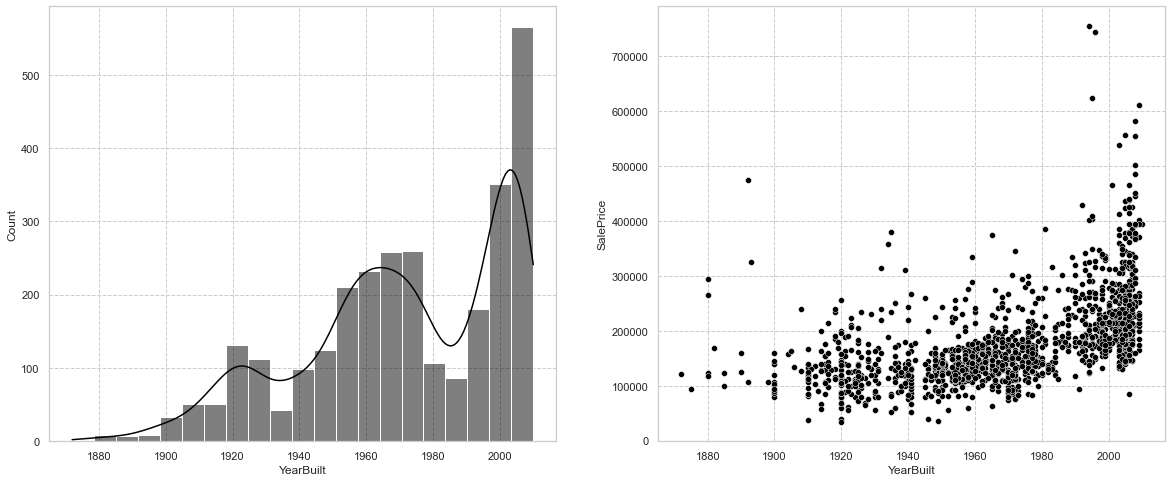

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

sns.histplot(x='YearBuilt',data=df, kde=True, ax=axs[0], color='black')
sns.scatterplot(x='YearBuilt', y='SalePrice', data=df, ax=axs[1], color='black')

In [32]:
# Are all the houses remodeled?

df['YearRemodAdd'].isnull().sum()

0

In [33]:
df[['YearBuilt', 'YearRemodAdd']].sample(10)

,YearBuilt,YearRemodAdd
Id,,
224,1971,1971
231,1959,1959
2202,1925,1997
2444,1900,2006
2087,1948,2005
2857,2005,2005
177,1988,1989
1044,1990,1990
2294,2005,2006


There seem to be many houses that have the same year build and year remodeled. 
There could be two reasons for that: 
1. The column YearRemodAdd just adds the date when it was built if there isnt future remodeling done.
2. The house could have been torn down completely and rebuilt

In [34]:
# checking how many rows have the same yearbuilt and yearremodadd
no_of_rows = df.loc[df['YearBuilt'] == df['YearRemodAdd'], 'YearBuilt'].count()
tot_rows = df.shape[0]

print("Number of houses that have the same YearBuilt and YearRemodAdd is: %d" % no_of_rows)
print("That represents a %.1f percentage of the total houses in this dataset" % ((no_of_rows/tot_rows)*100))

Number of houses that have the same YearBuilt and YearRemodAdd is: 1560
That represents a 53.4 percentage of the total houses in this dataset


Over 50% of the dataset has the same value for YearRemodAdd and YearBuilt. 

We are going to create a new variable that measures how many year since the house was built or remodeled (whichever came first), and since we know newer houses have a higher price, we would take an inverse of this number to make sure newer houses have a higher value.

In [35]:
df['YearsSinceBuilt/Remod'] = 1/(2022-df['YearRemodAdd'])

In [36]:
df.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,dataset,YearsSinceBuilt/Remod
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,Train,0.052632
2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,Train,0.021739


In [37]:
df.drop(columns={'YearBuilt','YearRemodAdd'}, inplace=True)

---------

## 3. Location of the House

<b> Question: </b> How does neighborhood impact the sale price? What areas tend to have houses that are more expensive than others? Do certain types of location of houses impact sale price? 

### Neighborhood

<b> Neighborhood: Physical locations within Ames city limits </b>

Blmngtn: Bloomington Heights

Blueste:	Bluestem

BrDale:	Briardale

BrkSide:	Brookside

ClearCr:	Clear Creek

CollgCr:	College Creek

Crawfor:	Crawford

Edwards:	Edwards

Gilbert:	Gilbert

IDOTRR:	Iowa DOT and Rail Road

MeadowV:	Meadow Village

Mitchel:	Mitchell

Names:	North Ames

NoRidge:	Northridge

NPkVill:	Northpark Villa

NridgHt:	Northridge Heights

NWAmes:	Northwest Ames

OldTown:	Old Town

SWISU:	South & West of Iowa State University

Sawyer:	Sawyer

SawyerW:	Sawyer West

Somerst:	Somerset

StoneBr:	Stone Brook

Timber:	Timberland

Veenker:	Veenker

In [38]:
df['Neighborhood'].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [39]:
neighborhood = df.groupby(['Neighborhood'], as_index=False).agg({'SalePrice':'mean', 'LotConfig':'count'}).sort_values(by='SalePrice', ascending=False)
neighborhood.rename(columns={'LotConfig':'Count'}, inplace=True)

In [40]:
neighborhood.head(2)

,Neighborhood,SalePrice,Count
15,NoRidge,335295.317073,71
16,NridgHt,316270.623377,166


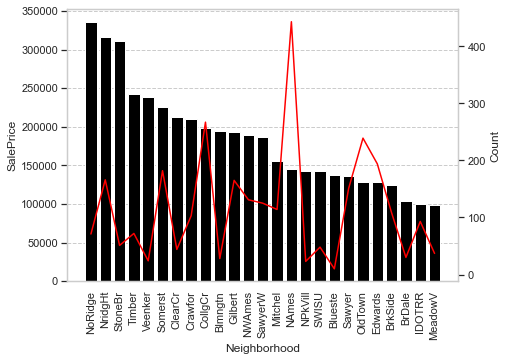

In [41]:
fig, axs1 = plt.subplots(1,1)
sns.barplot(x='Neighborhood',y='SalePrice',data=neighborhood, color='black', ax=axs1)
plt.xticks(rotation=90)
axs2 = axs1.twinx()
sns.lineplot(x='Neighborhood',y='Count', data=neighborhood, color='red', ax=axs2)
axs2.grid(False)
plt.show()

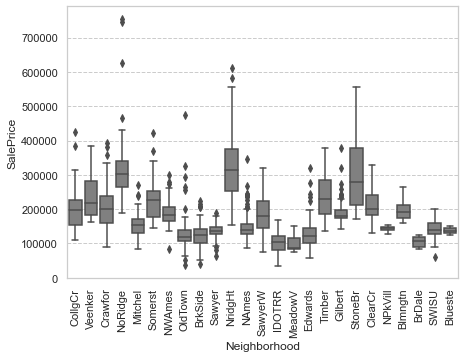

In [42]:
sns.boxplot(x='Neighborhood',y='SalePrice',data=df,color='grey')
plt.xticks(rotation=90)
plt.show()

NorthRidge, NorthRidge Heights, Stone Brook are the three communities that have the highest average sale price. Another point that we can see from the box plot is NorthRidge has a few really big outliers, that are probably pulling the mean price higher. However, these communities do not have many homes on sale.  North Ames and College Creek have the most number of on-sale houses. 

### Lot Config 

<b> LotConfig: Lot configuration </b>

Inside:	Inside lot

Corner:	Corner lot

CulDSac:	Cul-de-sac

FR2:	Frontage on 2 sides of property

FR3:	Frontage on 3 sides of property

In [43]:
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

<AxesSubplot:xlabel='LotConfig', ylabel='SalePrice'>

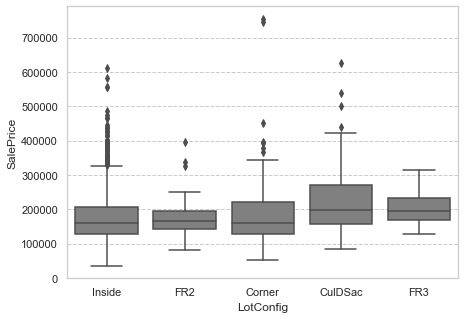

In [48]:
sns.boxplot(x='LotConfig',y='SalePrice', data=df, color='grey')

### Condition1
<b> Proximity to various conditions </b>

Artery: Adjacent to arterial street

Feedr:	Adjacent to feeder street	

Norm:	Normal	

RRNn:	Within 200' of North-South Railroad

RRAn:	Adjacent to North-South Railroad

PosN:	Near positive off-site feature--park, greenbelt, etc.

PosA:	Adjacent to postive off-site feature

RRNe:	Within 200' of East-West Railroad

RRAe:	Adjacent to East-West Railroad

In [44]:
df['Condition1'].value_counts()

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

<AxesSubplot:xlabel='Condition1', ylabel='SalePrice'>

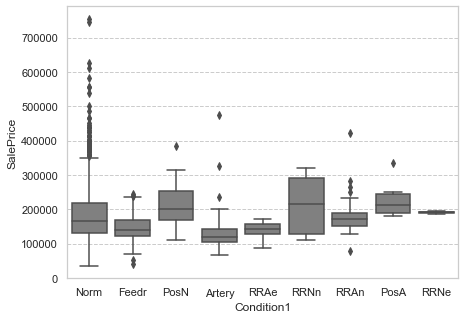

In [49]:
sns.boxplot(x='Condition1', y='SalePrice', data=df, color='grey')

In [45]:
df['Condition2'].value_counts()

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [ ]:
columns =['LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'SalePri']
location = df[columns]

#### LotFrontage/LotArear
What is Frontage?
In real estate, frontage is the width of a lot, measured at the front part of the lot. The term frontage appears on most real estate listings – sometimes abbreviated as ‘Frntg’. There are typically two measurements for a lot, the frontage and depth. Sometimes ‘road’ or ‘street’ frontage is used to describe the width of a lot as well. In commercial real estate, frontage may be described as ‘front foot’.

<b> Question: </b> What is the relationship between LotFrontage and Sale Price? Is there a relationship between LotFrontage and LotSize? Are there certain types of residences that have a larger LotFrontage?

Answer: There is some correlation between Saleprice and LotFrontage (35%) and a strong correlation between LotFrontage and LotArea (~50%). The 1 and 2 story newer buildings tend to have higher LotFrontage compared to other types of dwellings, which makes sense since they tend to be more expensive as well. 

In [29]:
df[['LotFrontage','LotArea']].describe()

,LotFrontage,LotArea
count,2433.000000,2919.000000
mean,69.305795,10168.114080
std,23.344905,7886.996359
min,21.000000,1300.000000
25%,59.000000,7478.000000
50%,68.000000,9453.000000
75%,80.000000,11570.000000
max,313.000000,215245.000000


Couple of things to note here:

- There are many NULL values. Probably associated with lots with no frontage. A question to answer here would be: does this impact the saleprice? 
- There seem to be certain values that look like outliers. The 75th percentile is at 80 feet, but the max is 313ft. 

<AxesSubplot:xlabel='LotArea', ylabel='Count'>

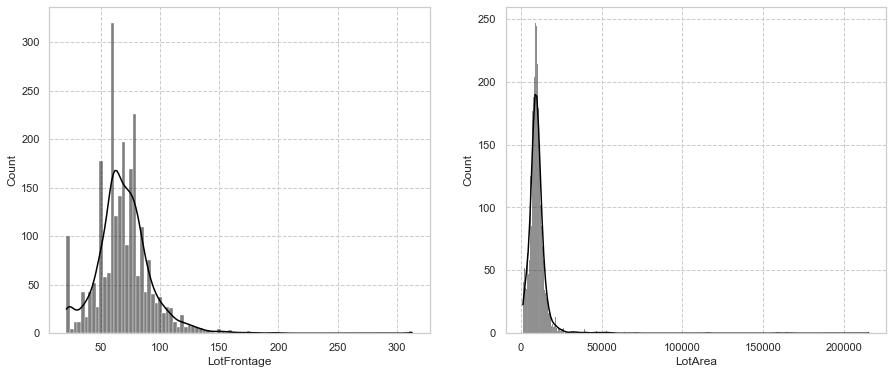

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
sns.histplot(x='LotFrontage', data=df, color='black', kde=True, ax=axs[0])
sns.histplot(x='LotArea', data=df, color='black', kde=True, ax=axs[1])

<AxesSubplot:xlabel='LotFrontage', ylabel='LotArea'>

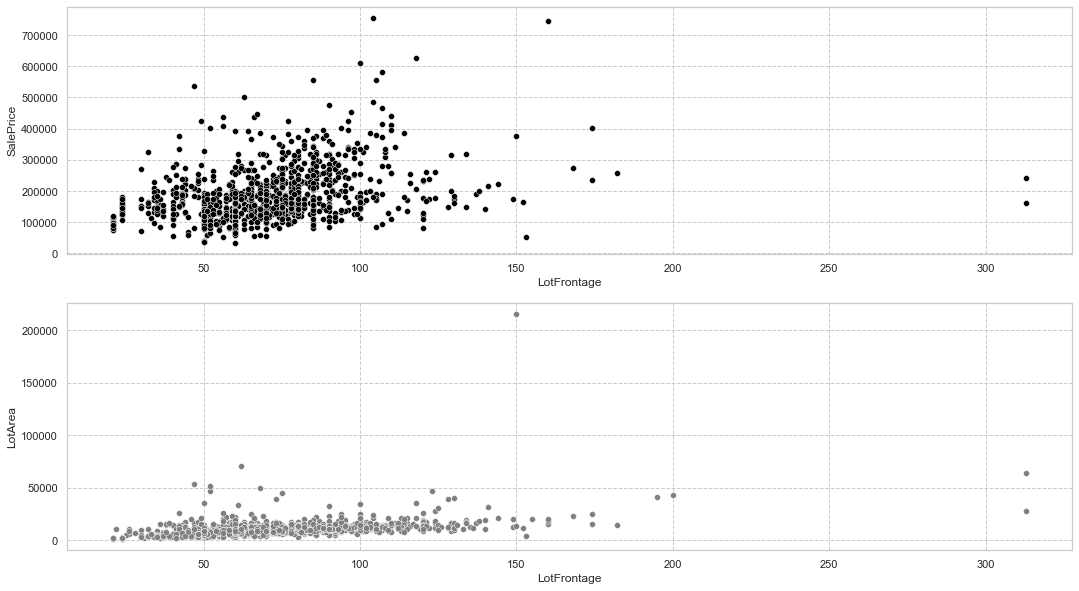

In [31]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18,10))
sns.scatterplot(x='LotFrontage', y='SalePrice', data=df, color='black', ax=axs[0])
sns.scatterplot(x='LotFrontage', y='LotArea', data=df, color='grey', ax=axs[1])

In [32]:
df[['SalePrice', 'LotFrontage', 'LotArea']].corr()

,SalePrice,LotFrontage,LotArea
SalePrice,1.000000,0.351799,0.263843
LotFrontage,0.351799,1.000000,0.489896
LotArea,0.263843,0.489896,1.000000


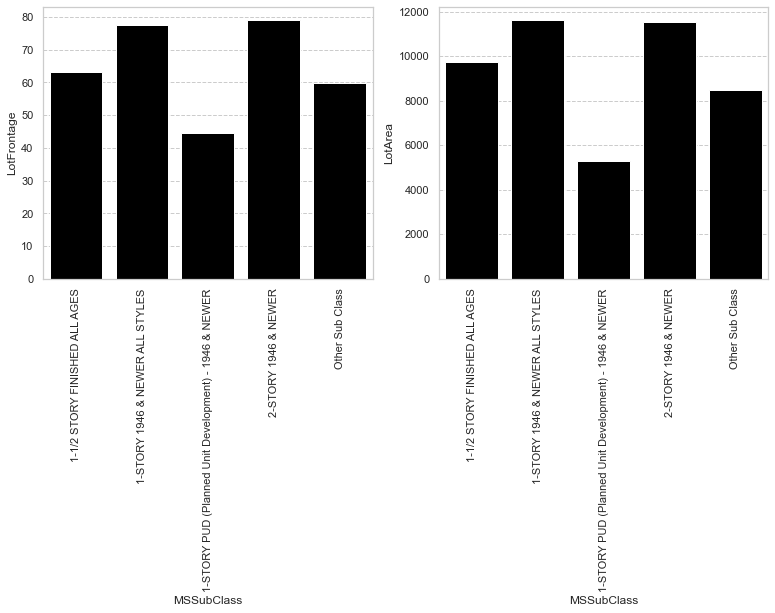

In [33]:
# Looking whether certain types of houses have larger lotfrontage/lotarea 
lot_frontage = df.groupby(['MSSubClass'], as_index=False).agg({'LotFrontage':'mean', 'LotArea':'mean'})

# Plotting 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13,5))
sns.barplot(x='MSSubClass',y='LotFrontage',data=lot_frontage,ax=axs[0],color='black')
sns.barplot(x='MSSubClass',y='LotArea',data=lot_frontage,ax=axs[1],color='black')
axs[0].tick_params('x',labelrotation=90)
axs[1].tick_params('x',labelrotation=90)

#### Street: Type of road access to property

<b>Question:</b> Does the type of steet have any impact on SalePrice?

Paved streets tend to be priced higher than Gravel streets. There are plenty of outliers for paved streets that make them unusually more expensive. 

<AxesSubplot:xlabel='Street', ylabel='SalePrice'>

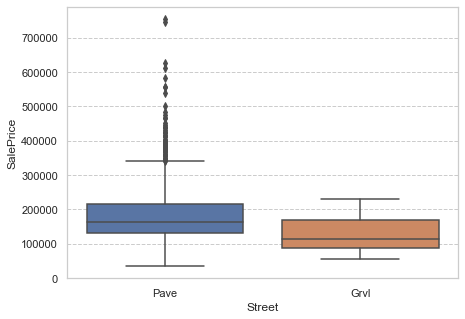

In [34]:
sns.boxplot(x='Street',y='SalePrice', data=df)